# 3.3장

본 노트북 파일은 Hands-on Machine Learning with Scikit-Learn & TensorFlow의 Chapter 2 (End-to-end Machine Learning Project)의 실습 코드를 참고하였습니다.

# Colab에서 실행하기

<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2025/blob/main/ML_day2/3_3_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 특성 살펴보기

In [ ]:
housing_url = 'https://raw.githubusercontent.com/SLCFLAB/Fintech2025/main/ML_day3/data/housing.csv'
housing = pd.read_csv(housing_url)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


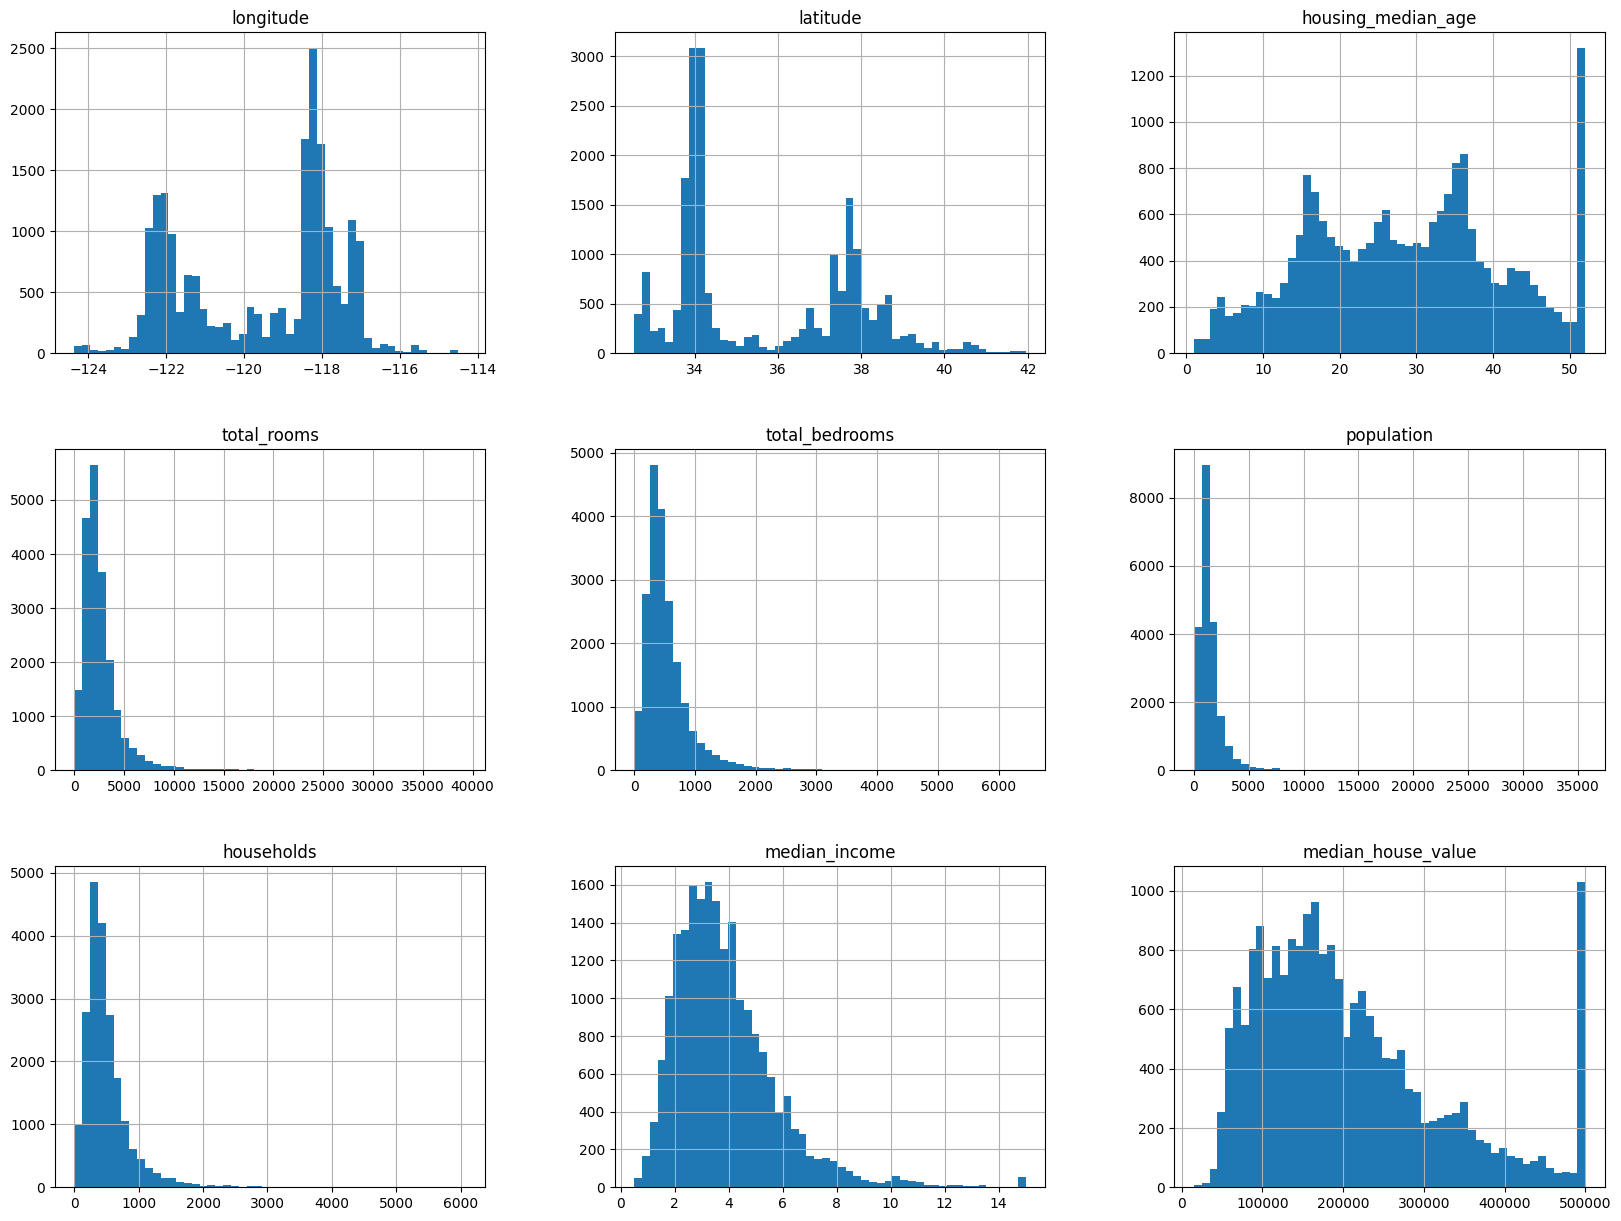

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

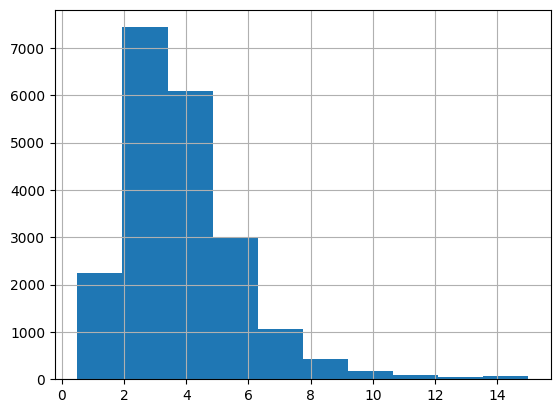

In [6]:
housing["median_income"].hist()

In [7]:
corr_matrix = housing.corr(numeric_only=True)

In [8]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

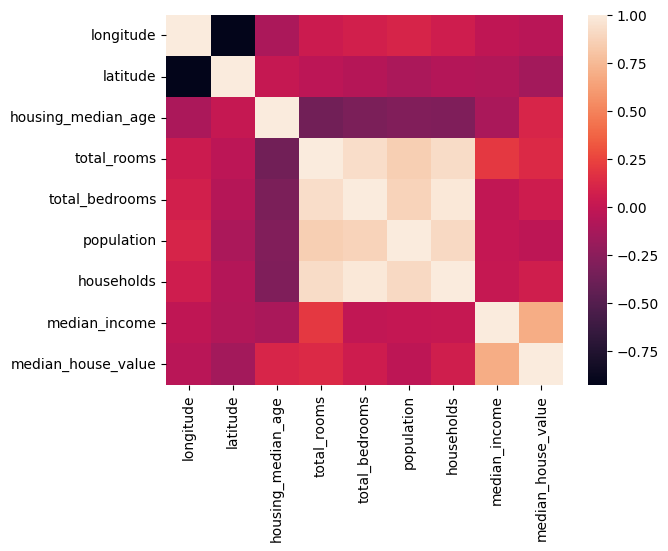

In [11]:
import seaborn as sns

sns.heatmap(corr_matrix)

### Missing value

In [12]:
housing['total_bedrooms'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [13]:
housing['total_bedrooms'].isna().sum()

np.int64(207)

In [15]:
median = housing["total_bedrooms"].median()
housing.fillna({"total_bedrooms": median}, inplace=True)

In [16]:
housing['total_bedrooms'].isna().sum()

np.int64(0)

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

In [18]:
imputer.fit(housing_num)
imputer.transform(housing_num)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]], shape=(20640, 9))

In [19]:
housing_num.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Categorical Attributes

In [20]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [24]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

### min-max scaler

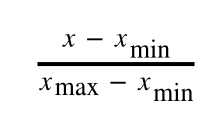

In [25]:
from sklearn.preprocessing import MinMaxScaler

data = housing[housing.columns[0:-1]]

# 0과 1사이로 분포를 transform
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.90226638],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.70824656],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.15938285],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.14371281],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.15340349]], shape=(20640, 9))

### StandardScaler

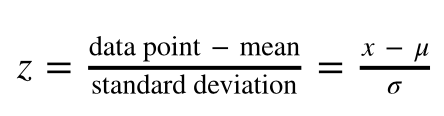

In [26]:
# 표준정규분포로 transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]], shape=(20640, 9))

### Pipeline : 앞서 여러 단계에 걸친 전처리 한꺼번에

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


### ColumnTransformer : column 별로 다른 처리 가능

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

housing_prepared = full_pipeline.fit_transform(housing)

### 훈련 세트에서 훈련하고 평가하기

In [29]:
data = scaler.transform(data)

In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
X_train, y_train = train_set[:,0:-1], train_set[:,-1]
X_test, y_test = test_set[:,0:-1], test_set[:,-1]

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

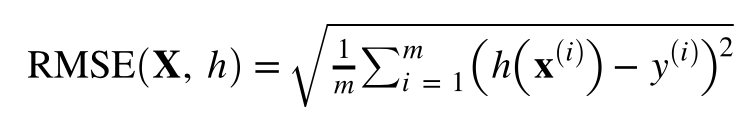

In [33]:
from sklearn.metrics import mean_squared_error

y_pred = tree_reg.predict(X_test)
y_true = y_test
rmse = np.sqrt(mean_squared_error(y_pred, y_true))
rmse

np.float64(0.6054756291162976)

## K-Fold Cross-Validation

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores

array([-0.3764722 , -0.38268065, -0.34170939, -0.34610794, -0.38171806,
       -0.36074588, -0.35798735, -0.37814586, -0.3627859 , -0.37847239])

In [35]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.6135733 , 0.61861188, 0.58455915, 0.58830939, 0.61783336,
       0.60062125, 0.59832044, 0.61493565, 0.60231711, 0.6152011 ])

In [36]:
print("평균:", rmse_scores.mean())
print("표준편차:", rmse_scores.std())

평균: 0.6054282617025093
표준편차: 0.011797533872402384


## 하이퍼 파라미터 튜닝

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합
    # n_estimators는 생성할 트리 개수
    {'max_depth': [10, 100, 1000], 'max_features': [2, 4, 6, 8]},
  ]

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, return_train_score=True)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [10, 100, 1000],
                          'max_features': [2, 4, 6, 8]}],
             return_train_score=True)

In [39]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 6}

In [40]:
cvres = grid_search.cv_results_

In [41]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
  # print(np.sqrt(-mean_score), params)

0.6039193154748871 {'max_depth': 10, 'max_features': 2}
0.6789754570752062 {'max_depth': 10, 'max_features': 4}
0.6920583203576112 {'max_depth': 10, 'max_features': 6}
0.690550993768673 {'max_depth': 10, 'max_features': 8}
0.5303050830591546 {'max_depth': 100, 'max_features': 2}
0.621291237210599 {'max_depth': 100, 'max_features': 4}
0.6272454819637608 {'max_depth': 100, 'max_features': 6}
0.6258753248025135 {'max_depth': 100, 'max_features': 8}
0.5053623577557164 {'max_depth': 1000, 'max_features': 2}
0.6096249601898756 {'max_depth': 1000, 'max_features': 4}
0.6353934194051934 {'max_depth': 1000, 'max_features': 6}
0.6243506286821543 {'max_depth': 1000, 'max_features': 8}


# Exercises

## 1.

서포트 벡터 머신 회귀(sklearn.svm.SVR)를 kernel=“linear”(하이퍼파라미터 C를 바꿔가며)나 kernel=“rbf”(하이퍼파라미터 C와 gamma를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요. 최상의 SVR 모델은 무엇인가요?

In [42]:
import sklearn

svr = sklearn.svm.SVR(kernel='rbf')

In [43]:
param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합
    # n_estimators는 생성할 트리 개수
    {'C': [1,10], 'gamma': [1, 2]},
  ]

grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)

In [44]:
grid_search.fit(X_train[:100], y_train[:100])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10], 'gamma': [1, 2]}],
             return_train_score=True)

In [45]:
grid_search.best_params_


{'C': 10, 'gamma': 1}

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.25190010283116876 {'C': 1, 'gamma': 1}
0.1344769028452819 {'C': 1, 'gamma': 2}
0.2968767815148401 {'C': 10, 'gamma': 1}
0.17047592683250795 {'C': 10, 'gamma': 2}


## 2.
질문: GridSearchCV를 RandomizedSearchCV로 바꿔보세요.

In [47]:
import sklearn
from sklearn.model_selection import RandomizedSearchCV

svr = sklearn.svm.SVR(kernel='rbf')
param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합
    # n_estimators는 생성할 트리 개수
    {'C': [1,5,10], 'gamma': [1, 2, 3, 4]},
  ]

grid_search = RandomizedSearchCV(svr, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train[:100], y_train[:100])
grid_search.best_params_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.25190010283116876 {'gamma': 1, 'C': 1}
0.1344769028452819 {'gamma': 2, 'C': 1}
0.09496381326816264 {'gamma': 3, 'C': 5}
0.03563502133206244 {'gamma': 4, 'C': 1}
0.07184100319387605 {'gamma': 3, 'C': 1}
0.2968767815148401 {'gamma': 1, 'C': 10}
0.09496381326816264 {'gamma': 3, 'C': 10}
0.04933801430359295 {'gamma': 4, 'C': 5}
0.29824951820503254 {'gamma': 1, 'C': 5}
0.04933801430359295 {'gamma': 4, 'C': 10}


## 3.

질문: 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해보세요.

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing = housing.drop("ocean_proximity", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [50]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint



param_distribs = {
        'n_estimators': randint(low=1, high=10),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A919C2F9E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A91A5C7E00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [52]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.15084867, 0.14137012, 0.06213972, 0.02594823, 0.0315988 ,
       0.03998383, 0.02704621, 0.47237976, 0.04868467])

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [54]:
k = 5

In [55]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([0, 1, 2, 7, 8])

In [56]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

## 4.
질문: 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보세요.

In [57]:
from sklearn.svm import SVR
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**grid_search.best_params_))
])